In [1]:
%matplotlib inline

import os
os.chdir('C:/Users/L/Documents/Homework/BME/Neuro Data I/tmp/seelviz/Jupyter/')

from argparse import ArgumentParser
from collections import OrderedDict
from subprocess import Popen
from scipy.stats import gaussian_kde
from matplotlib.backends.backend_pdf import PdfPages
from multiplot import feature_plot

import numpy as np
import nibabel as nb
import networkx as nx
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib

In [54]:
nfiles = [f for f in 
          os.listdir('C:/Users/L/Documents/Homework/BME/Neuro Data I/tmp/seelviz/Jupyter/DownsampleGraphML/subsample5000_r25') 
          if f.endswith('.5000.r25.graphml')]
print nfiles

cols = ['#984ea3','#4daf4a','#377eb8','#e41a1c']

['Aut1360localeq.5000.r25.graphml', 'Aut1374localeq.5000.r25.graphml', 'Cocaine174localeq.5000.r25.graphml', 'Cocaine175localeq.5000.r25.graphml', 'Cocaine178localeq.5000.r25.graphml', 'Control181localeq.5000.r25.graphml', 'Control182localeq.5000.r25.graphml', 'Control189localeq.5000.r25.graphml', 'Control239localeq.5000.r25.graphml', 'Control258localeq.5000.r25.graphml', 'Fear187localeq.5000.r25.graphml', 'Fear197localeq.5000.r25.graphml', 'Fear199localeq.5000.r25.graphml', 'Fear200localeq.5000.r25.graphml']


In [3]:
def scan_statistic(G, i):
    """
    Computes scan statistic-i on a set of graphs

    Required Parameters:
        G: graph
        i:
            - which scan statistic to compute
    """
    tmp = np.array(())
    for n in G.nodes():
        sg = nx.ego_graph(G, n, radius=i)
        tmp = np.append(tmp, np.sum([sg.get_edge_data(e[0], e[1])['weight']
                        for e in sg.edges()]))
        ss = tmp
    return ss

In [4]:
def density(data):
    """
    Computes density for metrics which return vectors

    Required parameters:
        data:
            - Dictionary of the vectors of data
    """
    dens = gaussian_kde(data)
    xs = np.linspace(0, 1.2*np.max(data), 1000)
    density = dens.pdf(xs)

    return {"xs": xs, "pdfs": density}

In [5]:
def write(outdir, metric, data, atlas):
    """
    Write computed derivative to disk in a pickle file
    Required parameters:
        outdir:
            - Path to derivative save location
        metric:
            - The value that was calculated
        data:
            - The results of this calculation
        atlas:
            - Name of atlas of interest as it appears in the directory titles
    """
    of = open(outdir + '/' + atlas + '_' + metric + '.pkl', 'wb')
    pickle.dump({metric: data}, of)
    of.close()

In [24]:
def color_out(dname, cols):
    """
    Select a color for the plotted data
    Used to show groupings of Control, Cocaine, Fear, and additional brains
    Required parameters:
        dname:
            - data set name
        cols:
            - list of colors
    """
    if g.startswith('Cocaine'):
        color = cols[1]
    elif g.startswith('Control'):
        color = cols[2]
    elif g.startswith('Fear'):
        color = cols[3]
    
    return color

In [6]:
os.chdir('C:/Users/L/Documents/Homework/BME/Neuro Data I/tmp/seelviz/Jupyter/DownsampleGraphML/subsample5000_r25/')
graphs = OrderedDict()
for f in nfiles:
#     print f
    G = nx.read_graphml(f)
    graphs[f] = G
# for g, graph in graphs.iteritems():    
#     print len(nx.edges(graph))

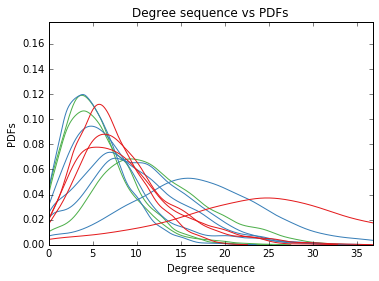

In [25]:
# Degree sequence
ax = plt.subplot(1,1,1)
plt.hold(True)
for g, graph in graphs.iteritems():
    temp_deg = np.array(nx.degree(graph).values())
    deg = density(temp_deg)
    # print deg
    xs = deg['xs']
    pdfs = deg['pdfs']

    # Autoscale Output Image
    pdfs = [i for i in pdfs if i >= 0.0001]
    xs = xs[0: len(pdfs)]
    xsMAX = np.amax(xs)
    pdfsMAX = np.amax(pdfs)

    # Plot File
    plt.axis([0, xsMAX + 0.001, 0, pdfsMAX + 0.1])
    plt.xlabel('Degree sequence')
    plt.ylabel('PDFs')
    plt.title(r'Degree sequence vs PDFs')
    color = cols[0]
    color = color_out(g, cols)
    fig1 = plt.plot(xs, pdfs, color)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
if g.endswith('.graphml'):
    fname = g[:-8]
#     print fname
plt.savefig('../../pngs/' + 'all_degreesequence.png', bbox_inches='tight')

# Make pickel
write('../../pickels', 'degree sequence', deg, 'all')

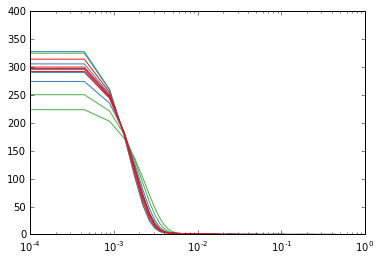

In [28]:
# Compute Edge Weights
plt.hold(True)
for g, graph in graphs.iteritems():
    temp_ew = [graph.get_edge_data(e[0], e[1])['weight'] for e in graph.edges()]
#     print type(temp_ew)
    ew = density(temp_ew)
#     print ew
    x = ew['xs']
    dens = ew['pdfs']
    color = color_out(g, cols)
    plt.plot(x, dens, color=color)

plt.xscale('log')
plt.savefig('../../pngs/' + 'all_edgeweights.png', bbox_inches='tight')
# Make pickel
write('../../pickels', 'edge weight', temp_ew, 'all')

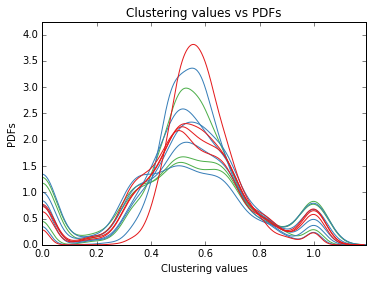

In [36]:
# Clustering Coefficients
plt.hold(True)
for g, graph in graphs.iteritems():
    G = graph

    nxc = nx.clustering 
    temp_cc = nxc(G).values()
    ccoefs = density(temp_cc)
    xscc = ccoefs['xs']
    pdfscc = ccoefs['pdfs']

    # Autoscale Output Image
    pdfscc = [i for i in pdfscc if i >= 0.0001]
    xscc = xscc[0: len(pdfscc)]
    xsccMAX = np.amax(xscc)
    pdfsccMAX = np.amax(pdfscc)

    # Plot File
    plt.axis([0, xsccMAX + 0.01, 0, (pdfsccMAX + 2)])
    plt.xlabel('Clustering values')
    plt.ylabel('PDFs')
    plt.title(r'Clustering values vs PDFs')
    
    color = color_out(g, cols)
    fig2 = plt.plot(xscc, pdfscc, color)

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)

plt.savefig('../../pngs/' + 'all_clusteringcoefficients.png', bbox_inches='tight')

# Make pickel
write('../../pickels', 'clustering coefficient', ccoefs, 'all')

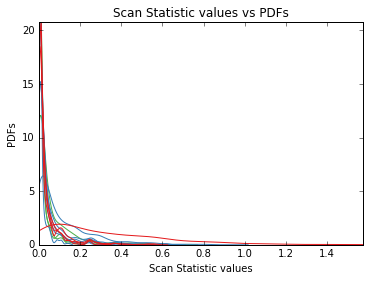

In [38]:
# Scan Statistic-1 
plt.hold(True)
for g, graph in graphs.iteritems():
    temp_ss1 = scan_statistic(graph, 1)
    ss1 = density(temp_ss1)

    xsss = ss1['xs']
    pdfsss = ss1['pdfs']

    # Autoscale Output Image
    pdfsss = [i for i in pdfsss if i >= 0.0001]
    xsss = xsss[0: len(pdfsss)]
    xsssMAX = np.amax(xsss)
    pdfsssMAX = np.amax(pdfsss)

    plt.axis([0, xsssMAX + 1, 0, pdfsssMAX + 0.01])
    plt.xlabel('Scan Statistic values')
    plt.ylabel('PDFs')
    plt.title(r'Scan Statistic values vs PDFs')
    color = color_out(g, cols)
    fig3 = plt.plot(xsss, pdfsss, color)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('../../pngs/' + 'all_scanstatistic.png')

# Make pickel
write('../../pickels', 'scan statistic-1', ss1, 'all')

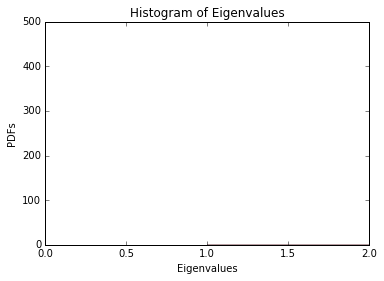

In [52]:
# EigenValues 
all_eigs = OrderedDict()

plt.hold(True)
    
for g, graph in graphs.iteritems():
    laplacian = nx.normalized_laplacian_matrix(graph)
    eigs = np.sort(np.linalg.eigvals(laplacian.A))[::-1]
    all_eigs[g] = eigs
    
    dens = eigs
    x = np.linspace(1, len(dens), len(dens))
    
    color = color_out(g, cols)
    
    plt.axis([0, 2, 0, 500])
    plt.xlabel('Eigenvalues')
    plt.ylabel('PDFs')
    plt.title(r'Histogram of Eigenvalues')
    plt.plot(x, dens, color=color, alpha=0.07)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('../../pngs/' + 'all_eigenvalues.png')

# Make pickel
write('../../pickels', 'eigenvalues', all_eigs, 'all')

NameError: name 'filename' is not defined

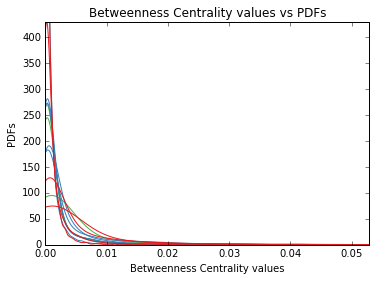

In [53]:
#Betweenness Centrality
plt.hold(True)
    
for g, graph in graphs.iteritems():
    nxbc = nx.algorithms.betweenness_centrality
    temp_bc = (nxbc(graph).values())
    centrality = density(temp_bc)

    xsbetween = centrality['xs']
    pdfsbetween = centrality['pdfs']

    # Autoscale Output Image
    pdfsbetween = [i for i in pdfsbetween if i >= 0.0001]
    xsbetween = xsbetween[0: len(pdfsbetween)]
    xsbetweenMAX = np.amax(xsbetween)
    pdfsbetweenMAX = np.amax(pdfsbetween)

    # Plot
    plt.axis([0, xsbetweenMAX, 0, pdfsbetweenMAX])
    plt.xlabel('Betweenness Centrality values')
    plt.ylabel('PDFs')
    plt.title(r'Betweenness Centrality values vs PDFs')
    color = color_out(g, cols)
    plt.plot(xsbetween, pdfsbetween, color)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('../../pngs/' + 'all_betweennesscentrality.png')

# Make pickel
write('../../pickels', 'betweenness centrality', centrality, 'all')